In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#full data frame with all data 
df=pd.read_excel('first survey - final (Responses).xlsx',sheetname=1,skiprows=1,keep_default_na=False)
#df=pd.read_excel('survey_test.xls',sheetname=1)

#get the column names 
c=df.columns

#we have a problem where 'N/A' is assigned the "Not a number" type, the NaN, which is excluded from other functions.
#code here acts to fix this so that these values are exp

#select the subset of the questions that are about wages
cwages=c[13:18]

print(cwages)


Index(['Wages [Hourly wage for Teaching Assistants (TAs) / Lab Demonstrators / Graders]',
       'Wages [Hourly wage for Chief Presiding Officers (CPOs)]',
       'Wages [Hourly wage for Assistant Invigilators]',
       'Wages [Hourly wage for Accessibility/AccessAbility Invigilators]',
       'Wages [Course salary for Course Instructors (CIs)]'],
      dtype='object')


In [2]:
#df[cwages[0]][df[cwages[0]].isnull()]='N/A'
print(df[cwages[0]].value_counts())


This is both important to me and affects me    105
This affects me personally                      35
This is important to me at UofT                 12
N/A                                              7
Name: Wages [Hourly wage for Teaching Assistants (TAs) / Lab Demonstrators / Graders], dtype: int64


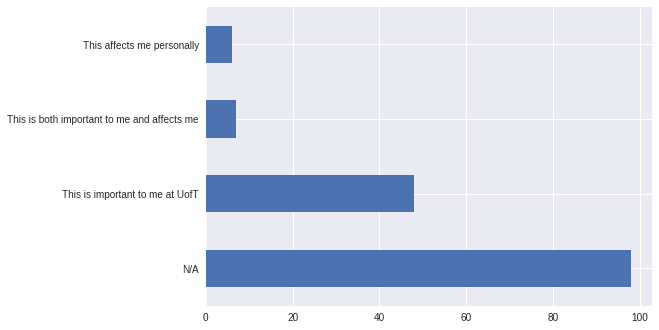

In [3]:
df[cwages[1]].value_counts().plot.barh()
plt.show()

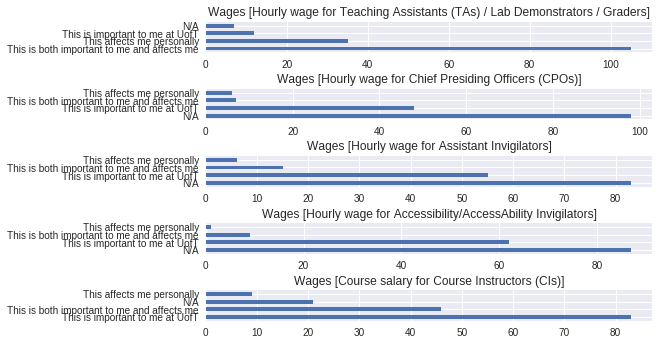

In [4]:
#make a bar plot of all wage questions
f0=plt.figure(0)
for ii in range(0,len(cwages)):
    plt.subplot(len(cwages),1,ii+1)
    df[cwages[ii]].value_counts().plot.barh()
    plt.title(cwages[ii])
f0.subplots_adjust(hspace=1.2)

plt.show()

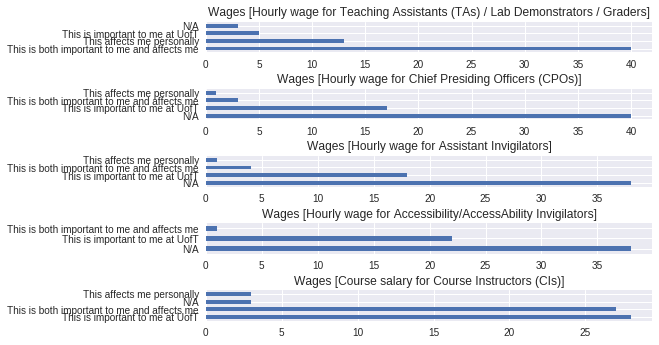

In [5]:
#make a bar plot of just the response from the humanities folks
f1=plt.figure(1)
for ii in range(0,len(cwages)):
    plt.subplot(len(cwages),1,ii+1)
    df.where(df['Which division(s) have you done Unit 1 work in?']=='Humanities')[cwages[ii]].value_counts().plot.barh()
    plt.title(cwages[ii])
f1.subplots_adjust(hspace=1.2)

plt.show()

In [10]:
df['Gender identity'].value_counts()

Woman                                            61
Man                                              41
Prefer not to say                                19
Cis, Woman                                       16
Cis, Man                                         10
Cis                                               5
Genderqueer, Non-binary, Trans                    3
Prefer to self-describe below                     1
Genderqueer                                       1
Agender, Genderqueer, Woman                       1
Agender, Genderfluid, Genderqueer, Non-binary     1
Name: Gender identity, dtype: int64

In [55]:
df['G']='N'
df['G'][df['Gender identity']=='Man']='M'
df['G'][df['Gender identity']=='Cis, Man']='M'
df['G'][df['Gender identity']=='Woman']='W'
df['G'][df['Gender identity']=='Cis, Woman']='W'
print(df['G'].value_counts())

W    77
M    51
N    32
Name: G, dtype: int64


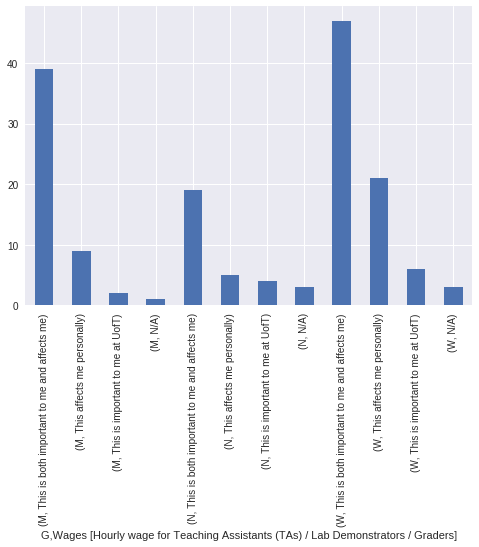

In [73]:
df2=df.groupby(df['G'])
df2[cwages[0]].value_counts().plot.bar(stacked=True)
#df2[cwages[0]].value_counts().plot(kind='bar', stacked=False)
plt.show()